# Import Library

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats # QQ Plot

# Exploratory Data Analyst

## Gathering Dataset

In [2]:
df = pd.read_csv('california_dataset.csv')

## Assesing Dataset

In [13]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [15]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [17]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
828,5.6400,27.0,5.833866,0.987220,1016.0,3.246006,37.62,-122.08,2.065
4833,1.7800,41.0,4.206107,1.083969,1868.0,4.753181,34.03,-118.30,1.625
8630,4.7500,36.0,5.926540,1.049763,1031.0,2.443128,33.88,-118.38,4.421
15850,4.5375,23.0,4.600000,1.100000,118.0,2.950000,37.74,-122.44,3.500
16983,5.8221,36.0,5.791367,1.007194,445.0,3.201439,37.56,-122.29,2.894


In [5]:
df.shape

(20640, 9)

In [6]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
house_price    0
dtype: int64

In [12]:
df.duplicated().sum()

0

## Cleansing Dataset

1. Outlier Handling

In [19]:
# Handling outlier dengan proses Trimming dataset.
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [23]:
# Spliting Data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [24]:
train.shape, test.shape

((16512, 6), (4128, 6))

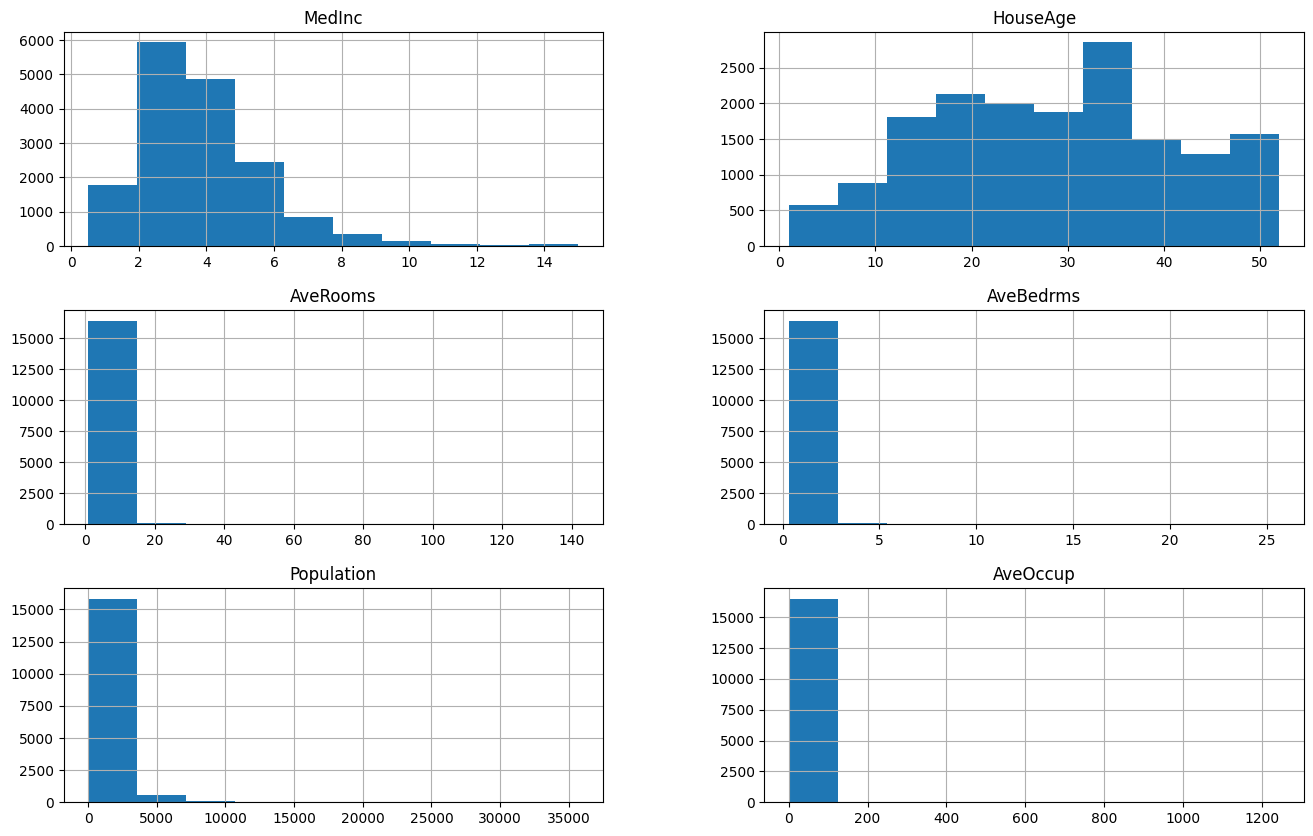

In [52]:
train.hist(figsize=(16,10))
plt.show()

In [53]:
# Fungsi Visualisasi dari setiap kolom
# Menampilkan berdasarkan Histogram, QQ plot dan Boxplot

def plot_diagnosa(train, nama_kolom):
    
    # atur ukuran gambar
    plt.figure(figsize=(16,4))

    # histogram
    plt.subplot(1,3,1)
    sns.histplot(train[nama_kolom], bins=30)
    plt.title('Histogram')

    # plot QQ
    plt.subplot(1,3,2)
    stats.probplot(train[nama_kolom], dist='norm', plot=plt)
    plt.ylabel('Variabel Quantiles')

    # Box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=train[nama_kolom])
    plt.title('Box Plot')

    plt.show()

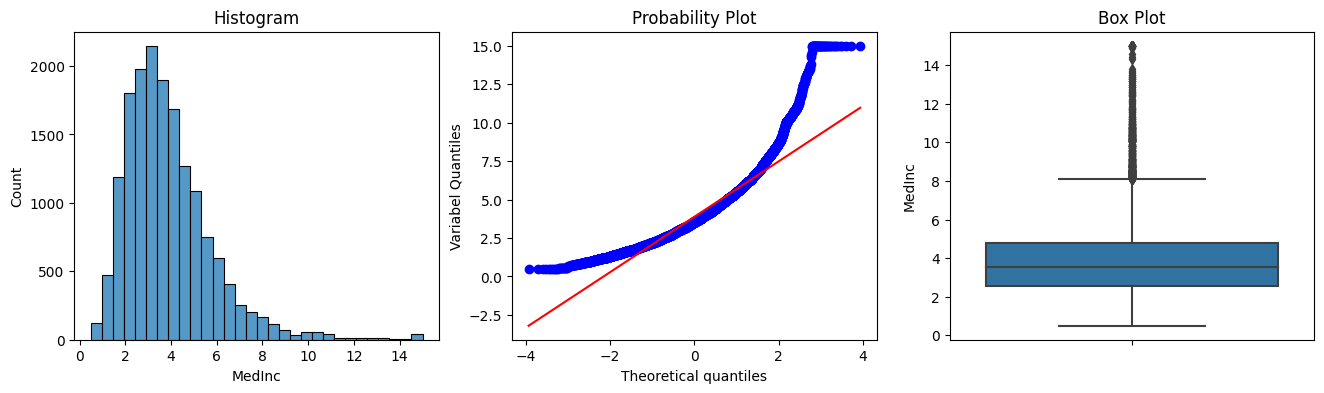

In [54]:
plot_diagnosa(train, 'MedInc')

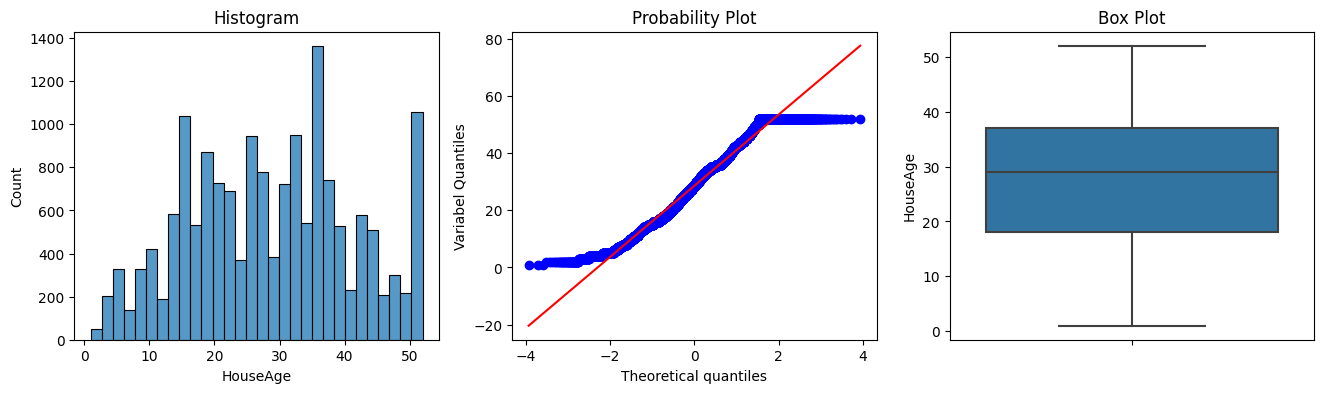

In [55]:
plot_diagnosa(train, 'HouseAge')

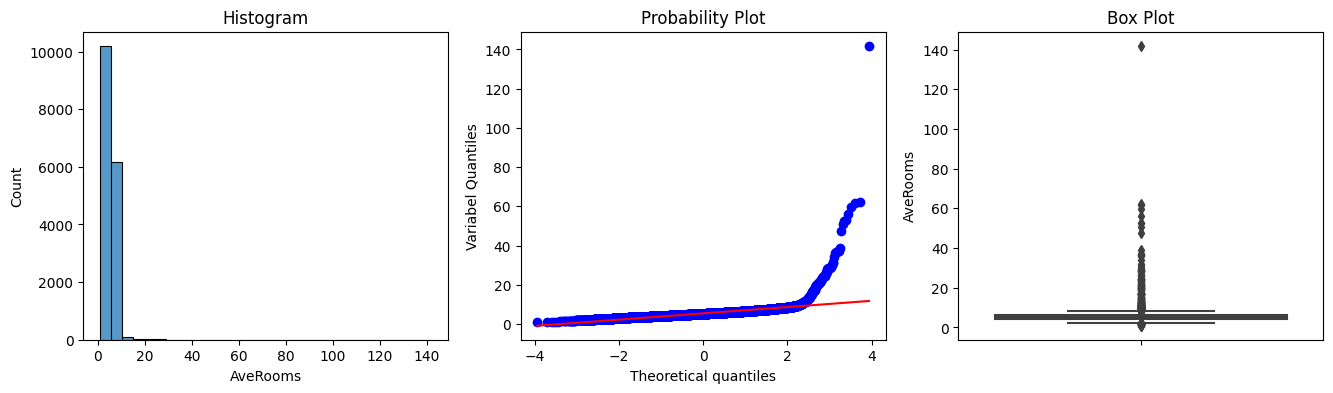

In [56]:
plot_diagnosa(train, 'AveRooms')

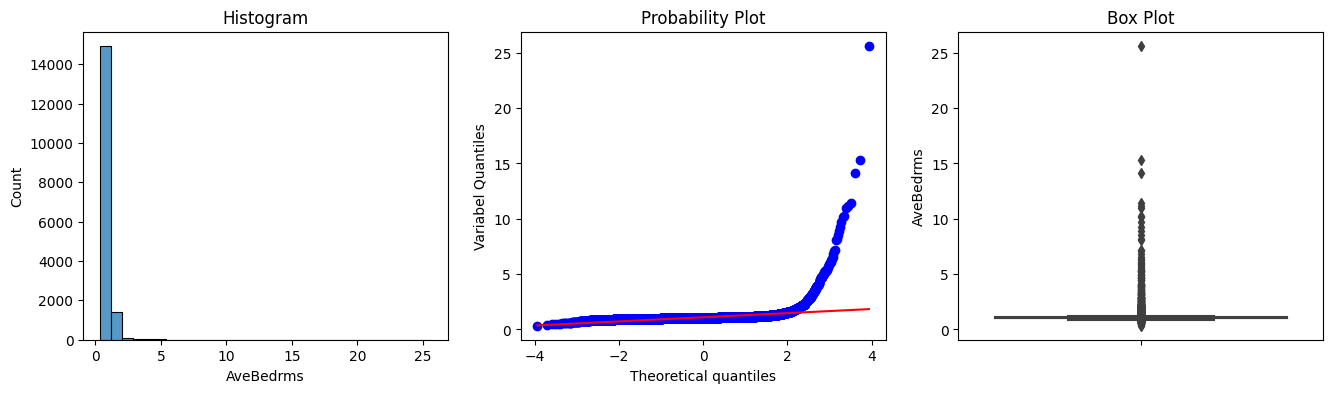

In [57]:
plot_diagnosa(train, 'AveBedrms')

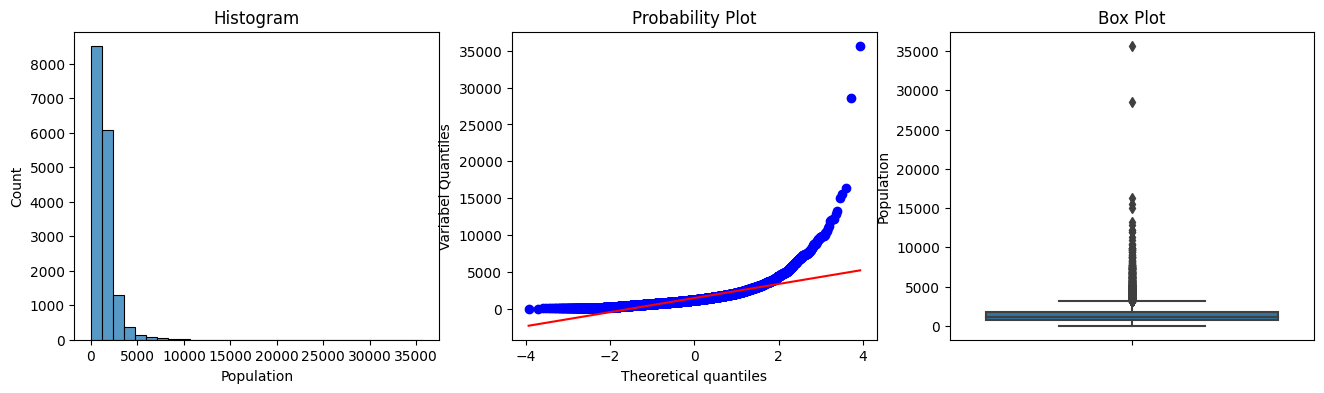

In [58]:
plot_diagnosa(train, 'Population')

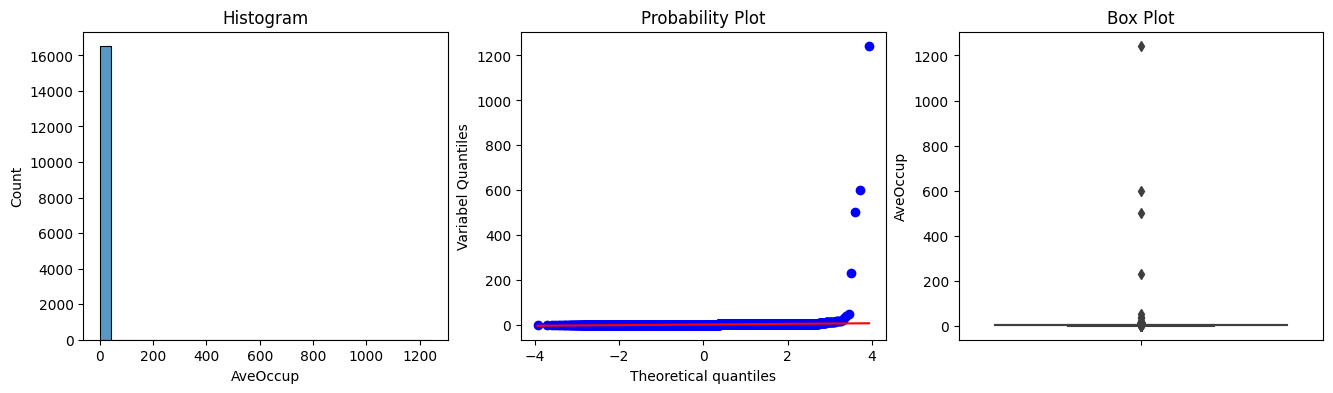

In [59]:
plot_diagnosa(train, 'AveOccup')

In [62]:
def batas_skew(train, nama_kolom, distance):

    # Mari kita hitung batas luar yang merupakan outlier
    # untuk distribusi yang miring

    # jarak yang dilewati sebagai argumen, memberi kita pilihan untuk melakukannya
    # perkirakan 1,5 kali atau 3 kali IQR yang akan dihitung
    # batas-batas.

    IQR = train[nama_kolom].quantile(0.75) - train[nama_kolom].quantile(0.25)

    lower_boundary = train[nama_kolom].quantile(0.25) - (IQR * distance)
    upper_boundary = train[nama_kolom].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [72]:
MedInc_upper_boundary, MedInc_lower_boundary = batas_skew(train, 'MedInc', 1.5)
HouseAge_upper_boundary, HouseAge_lower_boundary = batas_skew(train, 'HouseAge', 1.5)
AveRooms_upper_boundary, AveRooms_lower_boundary = batas_skew(train, 'AveRooms', 1.5)
AveBedrms_upper_boundary, AveBedrms_lower_boundary = batas_skew(train, 'AveBedrms', 1.5)
Population_upper_boundary, Population_lower_boundary = batas_skew(train, 'Population', 1.5)
AveOccup_upper_boundary, AveOccup_lower_boundary = batas_skew(train, 'AveOccup', 1.5)

In [73]:
print('Batas Atas, Batas Bawah')
print('MedInc', MedInc_upper_boundary, MedInc_lower_boundary)
print('HouseAge', HouseAge_upper_boundary, HouseAge_lower_boundary)
print('AveRooms', AveRooms_upper_boundary, AveRooms_lower_boundary)
print('AveBedrms', AveBedrms_upper_boundary, AveBedrms_lower_boundary)
print('Population', Population_upper_boundary, Population_lower_boundary)
print('AveOccup', AveOccup_upper_boundary, AveOccup_lower_boundary)

Batas Atas, Batas Bawah
MedInc 8.0828875 -0.7430125000000003
HouseAge 65.5 -10.5
AveRooms 8.474509781463325 2.0385818023548827
AveBedrms 1.2411074710635364 0.8657476648673017
Population 3131.5 -616.5
AveOccup 4.556801637852593 1.1519972702456773


In [50]:
outliers_MedInc = np.where(train['MedInc'] > MedInc_upper_boundary, True,
                       np.where(train['MedInc'] < MedInc_lower_boundary, True, False))

In [80]:
def deteksi_outlier(train, nama_kolom, upper_boundary, lower_boundary):
    outliers = np.where((train[nama_kolom] > upper_boundary) | (train[nama_kolom] < lower_boundary), True, False)
    return outliers

In [81]:
train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

In [82]:
outliers_MedInc = deteksi_outlier(train, 'MedInc', MedInc_upper_boundary,  MedInc_lower_boundary)
outliers_HouseAge = deteksi_outlier(train, 'HouseAge', HouseAge_upper_boundary,  HouseAge_lower_boundary)
outliers_AveRooms = deteksi_outlier(train, 'AveRooms', AveRooms_upper_boundary, AveRooms_lower_boundary)
outliers_AveBedrms = deteksi_outlier(train, 'AveBedrms', AveBedrms_upper_boundary,  AveBedrms_lower_boundary)
outliers_Population = deteksi_outlier(train, 'Population', Population_upper_boundary,  Population_lower_boundary)
outliers_MAveOccup = deteksi_outlier(train, 'AveOccup', AveOccup_upper_boundary,  AveOccup_lower_boundary)

In [85]:
outliers_MAveOccup

array([False, False, False, ..., False, False, False])

In [87]:
boston_train = train.loc[(~(outliers_MedInc + outliers_HouseAge + outliers_AveRooms + outliers_AveBedrms + outliers_Population + outliers_MAveOccup)),]
boston_train 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000
...,...,...,...,...,...,...
6265,3.7708,34.0,5.336420,1.000000,1341.0,4.138889
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891


In [88]:
train.shape, boston_train.shape

((16512, 6), (13460, 6))

In [89]:
boston_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

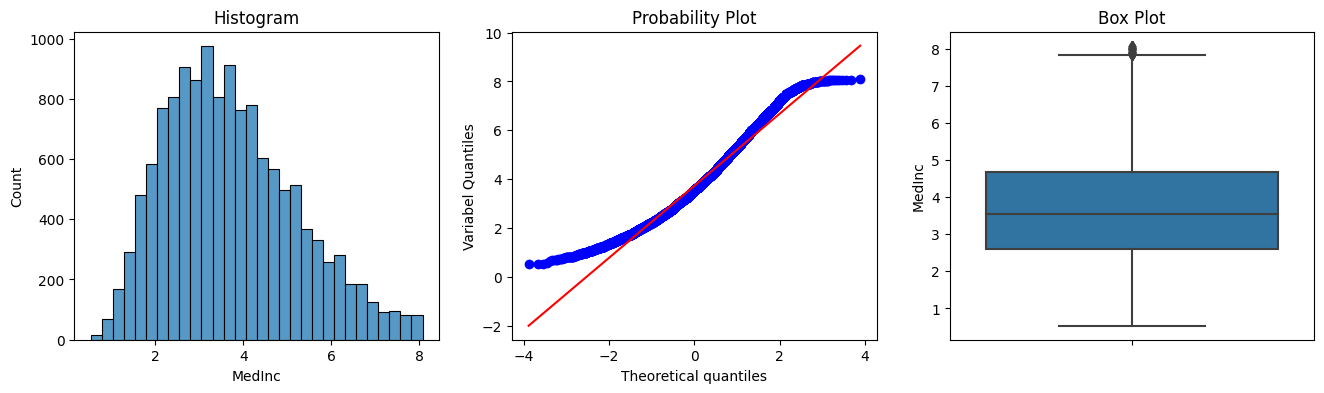

In [92]:
# Visualisasi data yang sudah di triming
plot_diagnosa(boston_train, 'MedInc')

4. Pemilihan dan Transformasi Fitur

5. Korelasi Antara Variabel

6. Scaling

Menyimpan Data yang Telah Dianalisis

Explanatory Data Analyst